
# House Pricing-Prediction 

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

  - Which variables are significant in predicting the price of a house, and

  - How well those variables describe the price of a house.

In [1]:
##Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 50000, "display.max_columns", None, "display.max_colwidth", None,"display.max_info_columns", 5000)

In [2]:
## Read the data from file 

houseprice = pd.read_csv("C:/Users/Documents/train.csv")

## Data Understanding

In [3]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
houseprice.shape

(1460, 81)

In [5]:
houseprice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
houseprice.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Cleaning

### We can see many columns are having NULL (Missing) values. We visit these columns one by one

#### LotFrontage

In [7]:
## Find number of NULL values for LotFrontage column
houseprice.LotFrontage.isnull().sum()/len(houseprice.index)

0.1773972602739726

In [8]:
## Check count for unique values
houseprice.LotFrontage.value_counts().sort_values

<bound method Series.sort_values of 60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45

In [9]:
## Check the mean and median
houseprice.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Mean and median is almost same for LotFrontage column. We will impute the NULL values with median = 69


In [10]:
houseprice.loc[houseprice["LotFrontage"].isnull(), "LotFrontage"] = 69.000000

In [11]:
houseprice.LotFrontage.isnull().sum()

0

#### Alley

In [12]:
houseprice.Alley.isnull().sum()/len(houseprice.index) * 100

93.76712328767123

For the above column, NULL values mean 'No access to Alley'. We can either change the values from NULL to 'NA' OR we can drop this column as >90% values are same (NO alley) and so not useful for analysis. We will drop this column.

In [13]:
houseprice.drop("Alley", axis=1, inplace=True)

#### MasVnrType

In [14]:
houseprice.MasVnrType.isnull().sum()/len(houseprice.index) * 100

0.547945205479452

In [15]:
## Very small % of NULL values. Lets check the unique values 
houseprice.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [16]:
## We will impute the NULL values with Mode = 'None'
houseprice.loc[houseprice.MasVnrType.isnull(), "MasVnrType"] = 'None'

In [17]:
houseprice.MasVnrType.isnull().sum()/len(houseprice.index) * 100

0.0

#### MasVnrArea

In [18]:
houseprice.MasVnrArea.isnull().sum()/len(houseprice.index)

0.005479452054794521

In [19]:
## Very small % of NULL values. Lets check MasVnrType for these values 
houseprice.MasVnrType[houseprice.MasVnrArea.isnull()]

234     None
529     None
650     None
936     None
973     None
977     None
1243    None
1278    None
Name: MasVnrType, dtype: object

In [20]:
## As seen above, for NULL values of MasVnrArea, MasVnrType is None. 
## Lets check MasVnrArea for other rows where MasVnrType = 'None'
houseprice.MasVnrArea[houseprice.MasVnrType == 'None'].value_counts()

0.0      859
1.0        2
312.0      1
344.0      1
288.0      1
Name: MasVnrArea, dtype: int64

We see majority of MasVnrArea is 0.0 for MasVnrType = 'None' . So we will update the rows where MasVnrArea = 0.0 where its NULL.

In [21]:
houseprice.loc[houseprice.MasVnrArea.isnull(), "MasVnrArea"] = 0.0

In [22]:
houseprice.MasVnrArea.isnull().sum()

0

#### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2

For the above columns, NULL values mean 'No Basement'. We will change the values from NULL to 'NA'

In [23]:
houseprice.BsmtQual.isnull().sum()/len(houseprice.index) *100

2.5342465753424657

In [24]:
houseprice.loc[houseprice.BsmtQual.isnull(), "BsmtQual"] = 'NA'

In [25]:
houseprice.BsmtQual.isnull().sum()/len(houseprice.index)

0.0

In [26]:
houseprice.BsmtCond.isnull().sum()/len(houseprice.index) * 100

2.5342465753424657

In [27]:
houseprice.loc[houseprice.BsmtCond.isnull(), "BsmtCond"] = 'NA'

In [28]:
houseprice.BsmtCond.isnull().sum()/len(houseprice.index)

0.0

In [29]:
houseprice.BsmtExposure.isnull().sum()/len(houseprice.index) * 100

2.6027397260273974

In [30]:
houseprice.loc[houseprice.BsmtExposure.isnull(), "BsmtExposure"] = 'NA'

In [31]:
houseprice.BsmtExposure.isnull().sum()/len(houseprice.index)

0.0

In [32]:
houseprice.BsmtFinType1.isnull().sum()/len(houseprice.index) * 100

2.5342465753424657

In [33]:
houseprice.loc[houseprice.BsmtFinType1.isnull(), "BsmtFinType1"] = 'NA'

In [34]:
houseprice.BsmtFinType1.isnull().sum()/len(houseprice.index) * 100

0.0

In [35]:
houseprice.BsmtFinType2.isnull().sum()/len(houseprice.index) * 100

2.6027397260273974

In [36]:
houseprice.loc[houseprice.BsmtFinType2.isnull(), "BsmtFinType2"] = 'NA'

In [37]:
houseprice.BsmtFinType2.isnull().sum()/len(houseprice.index) * 100

0.0

#### Electrical

In [38]:
## check number of NULL values
houseprice.Electrical.isnull().sum()

1

In [39]:
houseprice.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [40]:
## We will modify the the only NULL value with the highest occurring value (mode) = SBrkr 
houseprice.loc[houseprice.Electrical.isnull(), "Electrical"] = "SBrkr"

In [41]:
houseprice.Electrical.isnull().sum()

0

#### FireplaceQu   

In [42]:
houseprice.FireplaceQu.isnull().sum()/len(houseprice.index) * 100

47.26027397260274

For the above column, NULL values mean 'No Fireplace'. We will change the values from NULL to 'NA'

In [43]:
houseprice.loc[houseprice.FireplaceQu.isnull(), "FireplaceQu"] = 'NA'

In [44]:
houseprice.FireplaceQu.isnull().sum()/len(houseprice.index) * 100

0.0

#### GarageType, GarageFinish, GarageQual, GarageCond

In [45]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [46]:
houseprice.GarageType.isnull().sum()/len(houseprice.index) * 100
houseprice.GarageFinish.isnull().sum()/len(houseprice.index) * 100
houseprice.GarageQual.isnull().sum()/len(houseprice.index) * 100
houseprice.GarageCond.isnull().sum()/len(houseprice.index) * 100

5.5479452054794525

5.5479452054794525

5.5479452054794525

5.5479452054794525

For the above columns, NULL values mean 'No garage'. We will change the values from NULL to 'NA'

In [47]:
houseprice.loc[houseprice.GarageType.isnull(), "GarageType"] = 'NA'
houseprice.loc[houseprice.GarageFinish.isnull(), "GarageFinish"] = 'NA'
houseprice.loc[houseprice.GarageQual.isnull(), "GarageQual"] = 'NA'
houseprice.loc[houseprice.GarageCond.isnull(), "GarageCond"] = 'NA'

In [48]:
houseprice.GarageType.isnull().sum()/len(houseprice.index) * 100
houseprice.GarageFinish.isnull().sum()/len(houseprice.index) * 100
houseprice.GarageQual.isnull().sum()/len(houseprice.index) * 100
houseprice.GarageCond.isnull().sum()/len(houseprice.index) * 100

0.0

0.0

0.0

0.0

#### GarageYrBlt    

In [49]:
houseprice.GarageYrBlt.min()
houseprice.GarageYrBlt.max()

1900.0

2010.0

In [50]:
houseprice.GarageYrBlt.isnull().sum()

81

For the above column, NULL values mean 'No Garage'. We will change the values from NULL to '0.0'

In [51]:
houseprice.loc[houseprice.GarageYrBlt.isnull(), "GarageYrBlt"] = 0.0

In [52]:
houseprice.GarageYrBlt.isnull().sum()

0

In [53]:
## Change the datatype of GarageYrBlt from float to int
houseprice.GarageYrBlt = houseprice.GarageYrBlt.astype("int64")

#### PoolQC, Fence, MiscFeature

In [54]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [55]:
houseprice.PoolQC.isnull().sum()/len(houseprice.index) * 100

99.52054794520548

For the above column, NULL values mean 'No Pool'. We can either impute these values with 'NA' or drop this column. Since the number of records with 'NULL/NA' is > 90%, we will drop this column.

In [56]:
houseprice.drop('PoolQC', axis= 1, inplace=True)

In [57]:
houseprice.Fence.isnull().sum()/len(houseprice.index) * 100


80.75342465753424

For the above columns, NULL values mean 'No Fence'. We will change the values from NULL to 'NA'

In [58]:

houseprice.loc[houseprice.Fence.isnull(), "Fence"] = 'NA'


In [59]:
houseprice.Fence.isnull().sum()/len(houseprice.index) * 100

0.0

In [60]:
houseprice.MiscFeature.isnull().sum()/len(houseprice.index) * 100

96.30136986301369

For the above column, NULL values mean 'No Miscellaneous feature'. We can either impute these values with 'NA' or drop this column. Since the number of records with 'NULL/NA' is > 90%, we will drop this column.

In [61]:
houseprice.drop('MiscFeature', axis= 1, inplace=True)

In [62]:
## Check if all NULL values are handled
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [63]:
## Check all datatypes 
houseprice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,0,12,2008,WD,Normal,250000


In [64]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [65]:
houseprice.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1868.739726,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,453.697295,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Columns with Unique values 

Lets check the Categorical columns for number of Unique values. If the majority of rows are having unique value for the column, then we can drop that column as it wont be useful for analysis. 

In [66]:
## Create a separate dataframe for all categorical columns of houseprice
houseprice_categorical = houseprice.select_dtypes("object")

In [67]:
## % of Number of unique values for all columns 
for c in houseprice_categorical.columns:
    print ( c)
    print (houseprice_categorical[c].value_counts() / len(houseprice_categorical.index) * 100)

MSZoning
RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
Street
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
LotShape
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
LandContour
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
Utilities
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
LotConfig
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
LandSlope
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
Neighborhood
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbert     5.410959
NridgHt     5.273973
Sawyer      5.068493
NWAmes      5.000000
SawyerW     4.041096
BrkSide     3.97

Based on above analysis, we will drop all teh columns where >= 90% of rows have same unique value

In [68]:
## Drop the columns with >= 90% of rows having same unique value
houseprice.drop("Street", axis=1, inplace= True)
houseprice.drop("LandContour", axis=1, inplace= True)
houseprice.drop("Utilities", axis=1, inplace= True)
houseprice.drop("LandSlope", axis=1, inplace= True)
houseprice.drop("Condition2", axis=1, inplace= True)
houseprice.drop("RoofMatl", axis=1, inplace= True)
houseprice.drop("BsmtCond", axis=1, inplace= True)
houseprice.drop("Heating", axis=1, inplace= True)
houseprice.drop("CentralAir", axis=1, inplace= True)
houseprice.drop("Electrical", axis=1, inplace= True)
houseprice.drop("Functional", axis=1, inplace= True)
houseprice.drop("GarageQual", axis=1, inplace= True)
houseprice.drop("GarageCond", axis=1, inplace= True)
houseprice.drop("PavedDrive", axis=1, inplace= True)

In [69]:
## Drop column 'Id' which is not useful for analysis
houseprice.drop("Id", axis=1, inplace= True)

In [70]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  Exterior2nd    1460 non-null   object 
 17  MasVnrType     1460 non-null   object 
 18  MasVnrAr

## Data Visualization

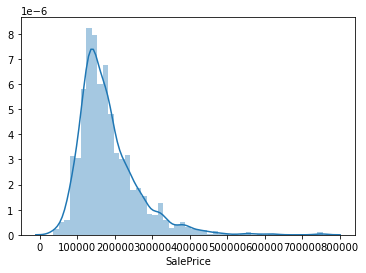

In [72]:
## Check distribution of price
sns.distplot(houseprice.SalePrice)

In [73]:
## Make a separate Dataframe for Numeric variables (we have already converted float to int. So int64 is the only datatype 
## we have for numeric variables in dataframe)
houseprice_numeric = houseprice.select_dtypes(["int64","float64"])
houseprice_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,12,2008,250000


<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

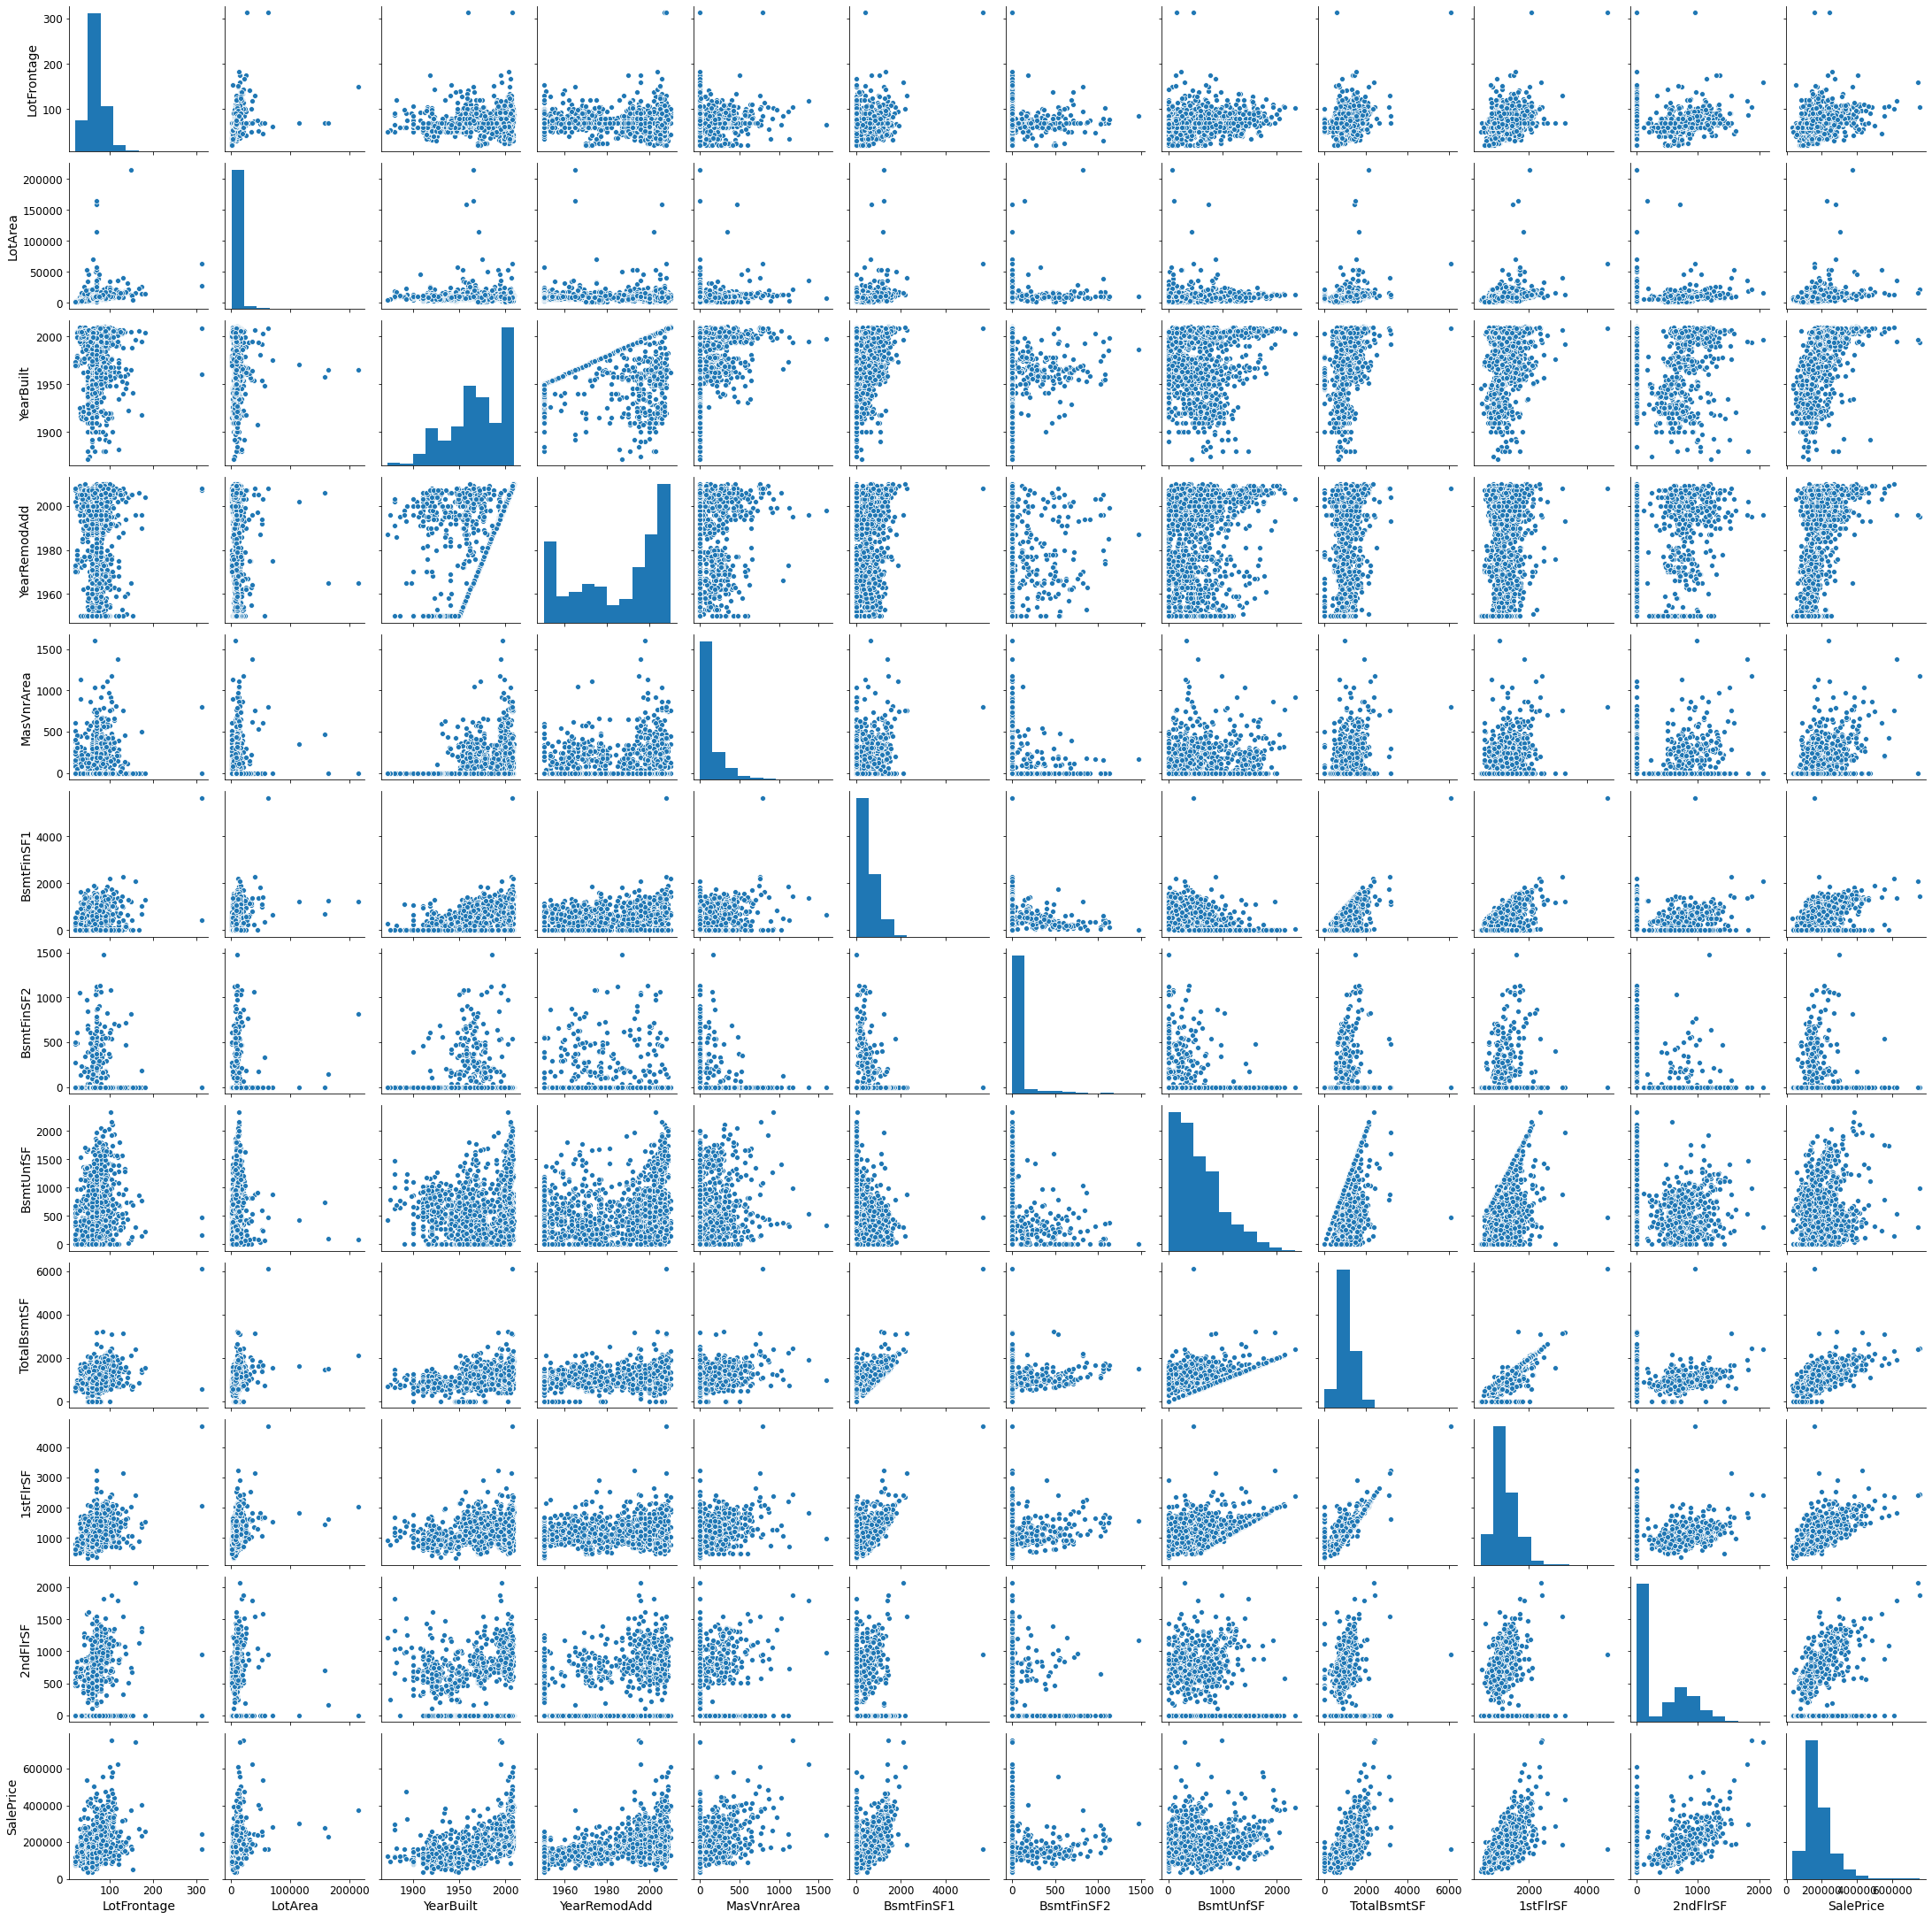

In [74]:
## Lets plot the pairplot to see relation between different Continuous variables and Salesprice. 
## We are plotting 2 separate pairplots because the of large number of variables/
plt.figure(figsize=(20, 10))
sns.set_context( rc={"axes.labelsize":14, "xtick.labelsize":12, "ytick.labelsize":12})
sns.pairplot(houseprice_numeric, vars = ["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF","SalePrice"])
plt.show()

We can see Salesprice having strong linearly relation to :
   - TotalBsmtSF , 1stFlrSF & 2ndFlrSF 

And its somewhat linearly related to :
   - BsmtUnfSF , BsmtFinSF2 , BsmtFinSF1, MasVnrArea, YearRemodAdd, YearBuilt 

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

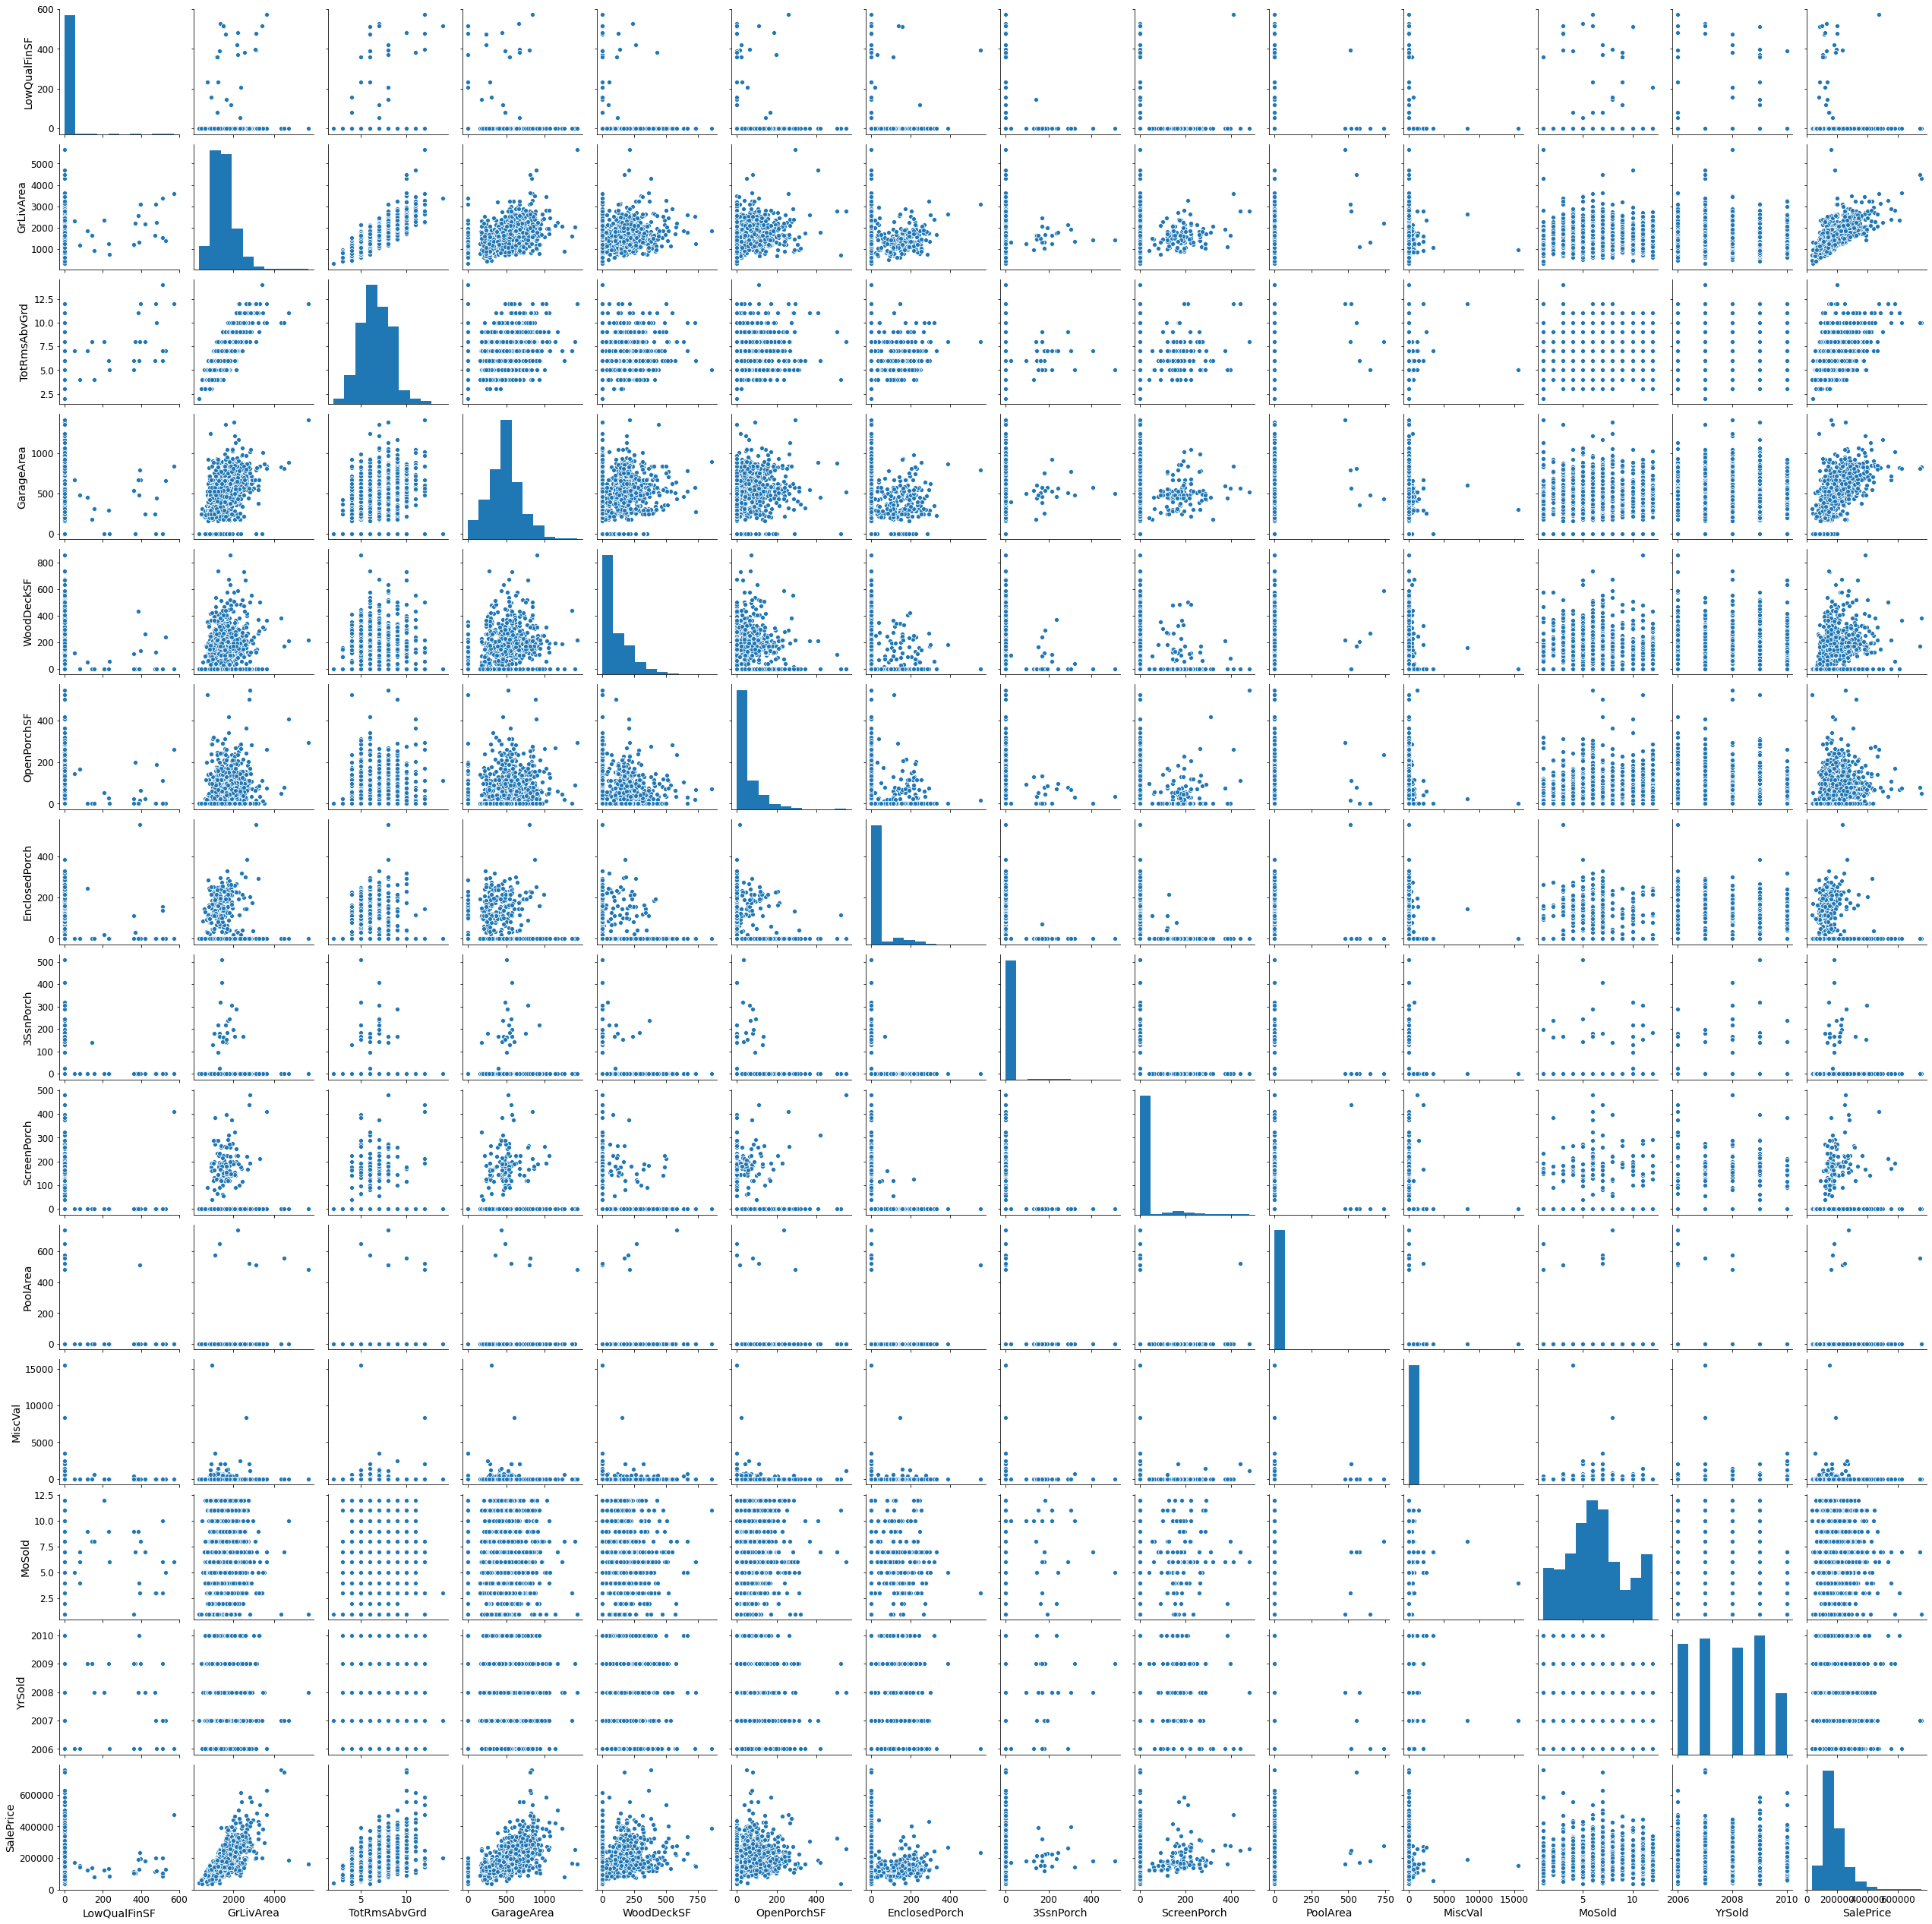

In [75]:
plt.figure(figsize=(20, 10))
sns.set_context( rc={"axes.labelsize":14, "xtick.labelsize":12, "ytick.labelsize":12})
sns.pairplot(houseprice_numeric, vars = [ "LowQualFinSF", "GrLivArea","TotRmsAbvGrd", "GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch", "PoolArea","MiscVal","MoSold","YrSold","SalePrice"])
plt.show()

We can see Salesprice having  linear relation to :
  - GrLivArea , GarageArea , WoodDeckSF & OpenPorchSF 

#### Since pairplots are difficult to read, we will also plot the correlation heatmap

In [76]:
cor = houseprice_numeric.corr()

In [77]:
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.080997,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.099196,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.006515,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.132696,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,0.035070,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


<Figure size 1440x1080 with 0 Axes>

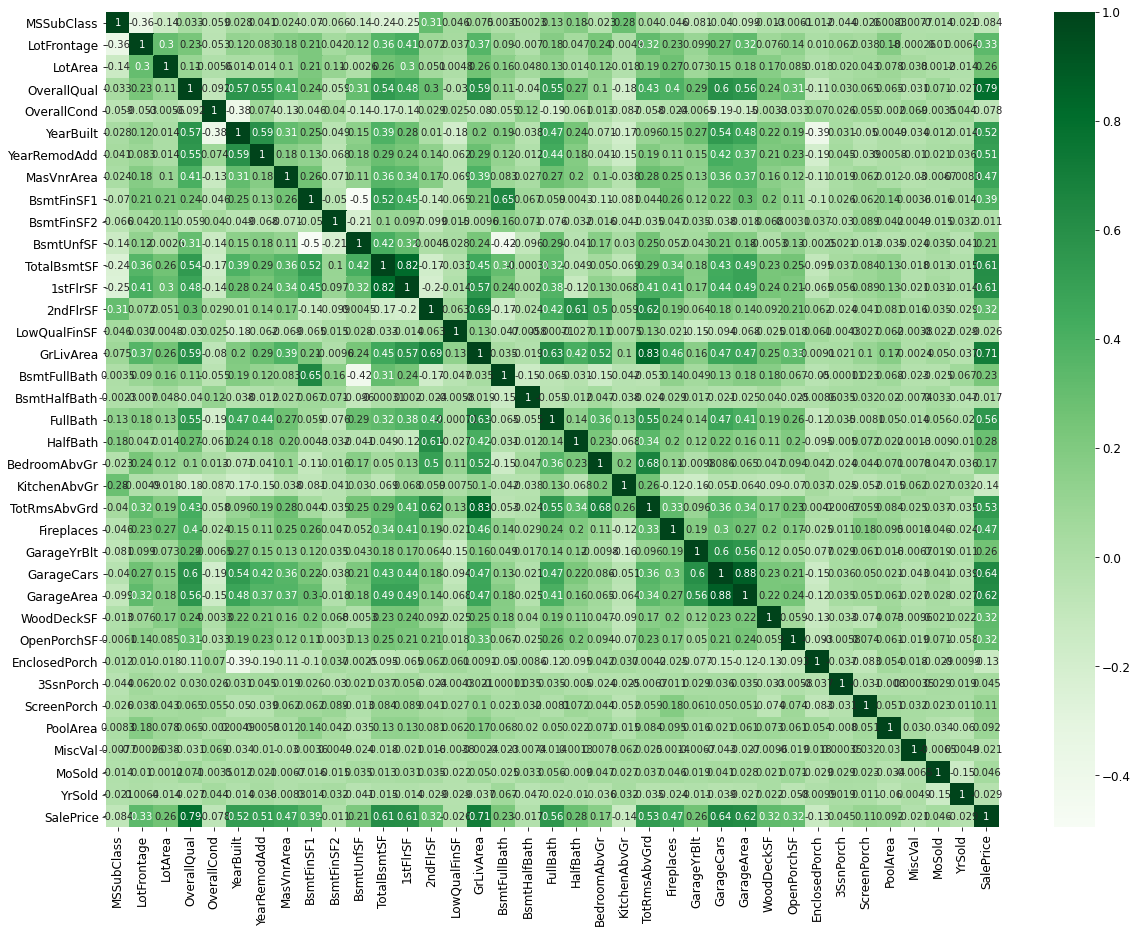

In [78]:
# Plot the Heatmap for correlation
plt.figure(figsize = (20, 15))

sns.heatmap(cor, cmap= 'Greens', annot = True)


The above heatmap show useful insights:


Correlation of price with independent variables:

   - It suggests strong positive correlation between Sales price & OverallQual, GrLivArea, TotalBsmtSF, 1stFlrSF,FullBath, GarageCars, GarageArea and good positive relation between Sales Price & YearBuilt, YearRemodAdd, MasVnrArea, TotRmsAbvGrd, Fireplaces
   

Correlation between independent variables:

   - OverallQual is correlated to YearBuilt, YearRemodAdd,GarageCars, GrLivArea
   - GrLivArea is  correlated to TotRmsAbvGrd, 1stFlrSF, 2ndFlrSF, GarageArea
   - GarageCars, GarageYrBlt & GarageArea are correlated 
   - TotRmsAbvGrd is correlated to 2ndFlrSF, GrLivArea, FullBath, BedroomabvGr

### Handle multicollinearity

As we see there are few independent variables which are highly collinear to other independent variables. We will drop them in order to get correct coefficients

Drop below variables 
   - GrLivArea
   - OverallQual
   - GarageArea
   - TotRmsAbvGrd

In [79]:
houseprice.drop(["GrLivArea", "OverallQual","GarageArea", "TotRmsAbvGrd"], axis = 1, inplace=True)

## Data Preparation

### 1. Derived Variables

Lets add variable `Age of house` which is nothing but : Year the house was sold (YrSold) - Year the house was built (YrBuilt)

In [80]:
houseprice["HouseAge"] = houseprice.YrSold - houseprice.YearBuilt

In [81]:
houseprice.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge
0,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,Unf,0,150,856,Ex,856,854,0,1,0,2,1,3,1,Gd,0,NA,Attchd,2003,RFn,2,0,61,0,0,0,0,NA,0,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,Unf,0,284,1262,Ex,1262,0,0,0,1,2,0,3,1,TA,1,TA,Attchd,1976,RFn,2,298,0,0,0,0,0,NA,0,5,2007,WD,Normal,181500,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,Unf,0,434,920,Ex,920,866,0,1,0,2,1,3,1,Gd,1,TA,Attchd,2001,RFn,2,0,42,0,0,0,0,NA,0,9,2008,WD,Normal,223500,7
3,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,Unf,0,540,756,Gd,961,756,0,1,0,1,0,3,1,Gd,1,Gd,Detchd,1998,Unf,3,0,35,272,0,0,0,NA,0,2,2006,WD,Abnorml,140000,91
4,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,Unf,0,490,1145,Ex,1145,1053,0,1,0,2,1,4,1,Gd,1,TA,Attchd,2000,RFn,3,192,84,0,0,0,0,NA,0,12,2008,WD,Normal,250000,8


### 2. Create DUMMY variables for all categorical variables

In [82]:
## Create a new dataframe for all categorical variables
houseprice_categorical = houseprice.select_dtypes("object")

In [83]:
houseprice_categorical.head()

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageFinish,Fence,SaleType,SaleCondition
0,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Unf,Ex,Gd,NA,Attchd,RFn,NA,WD,Normal
1,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Unf,Ex,TA,TA,Attchd,RFn,NA,WD,Normal
2,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Unf,Ex,Gd,TA,Attchd,RFn,NA,WD,Normal
3,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,ALQ,Unf,Gd,Gd,Gd,Detchd,Unf,NA,WD,Abnorml
4,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Unf,Ex,Gd,TA,Attchd,RFn,NA,WD,Normal


In [84]:
## Convert the variables into Dummies
houseprice_dummies = pd.get_dummies(houseprice_categorical, drop_first= True)

In [85]:
houseprice_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,

In [86]:
houseprice_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 161 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   MSZoning_FV            1460 non-null   uint8
 1   MSZoning_RH            1460 non-null   uint8
 2   MSZoning_RL            1460 non-null   uint8
 3   MSZoning_RM            1460 non-null   uint8
 4   LotShape_IR2           1460 non-null   uint8
 5   LotShape_IR3           1460 non-null   uint8
 6   LotShape_Reg           1460 non-null   uint8
 7   LotConfig_CulDSac      1460 non-null   uint8
 8   LotConfig_FR2          1460 non-null   uint8
 9   LotConfig_FR3          1460 non-null   uint8
 10  LotConfig_Inside       1460 non-null   uint8
 11  Neighborhood_Blueste   1460 non-null   uint8
 12  Neighborhood_BrDale    1460 non-null   uint8
 13  Neighborhood_BrkSide   1460 non-null   uint8
 14  Neighborhood_ClearCr   1460 non-null   uint8
 15  Neighborhood_CollgCr   1460 non-null 

In [87]:
## Drop the Original categorical varables from houseprice dataframe
houseprice.drop(houseprice_categorical, axis = 1, inplace = True)

In [88]:
## Concatenate the dummy variables to the original houseprice
houseprice = pd.concat([houseprice, houseprice_dummies], axis= 1)

In [89]:
## Reset the index
houseprice = houseprice.reset_index(drop = True)

In [90]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 195 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSSubClass             1460 non-null   int64  
 1   LotFrontage            1460 non-null   float64
 2   LotArea                1460 non-null   int64  
 3   OverallCond            1460 non-null   int64  
 4   YearBuilt              1460 non-null   int64  
 5   YearRemodAdd           1460 non-null   int64  
 6   MasVnrArea             1460 non-null   float64
 7   BsmtFinSF1             1460 non-null   int64  
 8   BsmtFinSF2             1460 non-null   int64  
 9   BsmtUnfSF              1460 non-null   int64  
 10  TotalBsmtSF            1460 non-null   int64  
 11  1stFlrSF               1460 non-null   int64  
 12  2ndFlrSF               1460 non-null   int64  
 13  LowQualFinSF           1460 non-null   int64  
 14  BsmtFullBath           1460 non-null   int64  
 15  Bsm

The final dataframe has 199 columns which include 198 features and 1 dependent (target) variable

### 3. Splitting data into Train and Test dataset

In [91]:
## Split the dataset into train and test data 

from sklearn.model_selection import train_test_split
np.random.seed(0)
houseprice_train, houseprice_test = train_test_split(houseprice, train_size=0.7, test_size= 0.3, random_state = 100)

### 4. Rescaling the features

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
## We will try minmax scaling on train dataset
scaler = MinMaxScaler()

In [94]:
houseprice.head()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,5,2003,2003,196.0,706,0,150,856,856,854,0,1,0,2,1,3,1,0,2003,2,0,61,0,0,0,0,0,2,2008,208500,5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,8,1976,1976,0.0,978,0,284,1262,1262,0,0,0,1,2,0,3,1,1,1976,2,298,0,0,0,0,0,0,5,2007,181500,31,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,5,2001,2002,162

In [95]:
## Select the Numeric columns in separate dataframe

houseprice_numeric = houseprice_train.select_dtypes(["int64","float64"])

In [96]:
## Scale the Numeric varaiables with MinMaxScaler. 
## Categorical variables dont need scaling because they are already converted to 0 or 1.

houseprice_train[houseprice_numeric.columns] = scaler.fit_transform(houseprice_train[houseprice_numeric.columns])


In [97]:
houseprice_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000

In [98]:
## Store independent set of variables in a new dataframe X
X_train= houseprice_train.loc[:, houseprice_train.columns != "SalePrice"]

In [99]:
## Store dependent variable in a separate series y  
y_train= houseprice_train.loc[:,"SalePrice"]

In [100]:
## Store independent set of variables in a new dataframe X
X_test= houseprice_test.loc[:, houseprice_test.columns != "SalePrice"]

In [101]:
## Store dependent variable in a separate series y  
y_test= houseprice_test.loc[:,"SalePrice"]

## Model Building and Evaluation

Lets now try predicting house SalePrice by using Lasso and Ridge regression

### Lasso Regression

In [102]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import SCORERS
from sklearn.metrics import make_scorer

In [103]:
lasso = Lasso()

In [104]:
## Define the list of alpha 
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05, 0.1,  0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

In [105]:
scorings = ['neg_mean_absolute_error','r2']

In [106]:
## Cross validation
## Run GridSearchCV for Lasso regression & 2 scores - negative mean absolute error and R2 
## Get the diferent models for different values of alpha(regularization term) parameter

folds = 5 
model_cv = GridSearchCV (estimator = lasso,
                        param_grid = params,
                        scoring = scorings,
                        cv = folds,
                        refit = 'neg_mean_absolute_error',
                        return_train_score = True,
                        verbose = 1
                        )
model_cv.fit(X_train , y_train)

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    2.2s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50, 100, 500, 1000]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'r2'], verbose=1)

In [107]:
## Store the model performance results in cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [108]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,split3_train_neg_mean_absolute_error,split4_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2
0,0.069006,0.015672,0.003413,5.194313e-04,1e-05,{'alpha': 1e-05},-0.028207,-0.028884,-0.031783,-0.027831,-0.031539,-0.029649,0.001679,2,-0.023175,-0.018882,-0.021412,-0.023244,-0.022760,-0.021895,0.001644,0.826655,0.689225,0.749058,0.845442,0.827535,0.787583,0.059378,2,0.894051,0.914167,0.908599,0.890375,0.894546,0.900348,0.009293
1,0.021328,0.004394,0.002990,8.583069e-07,0.0001,{'alpha': 0.0001},-0.025070,-0.027861,-0.029681,-0.024617,-0.026841,-0.026814,0.001854,1,-0.023482,-0.019740,-0.021715,-0.023516,-0.023481,-0.022387,0.001492,0.860155,0.716153,0.783792,0.877205,0.849091,0.817279,0.059648,1,0.882535,0.905709,0.897505,0.879285,0.881747,0.889356,0.010389
2,0.008097,0.000244,0.003189,4.000204e-04,0.001,{'alpha': 0.001},-0.028090,-0.034583,-0.032064,-0.030733,-0.034147,-0.031923,0.002373,3,-0.030776,-0.028974,-0.029559,-0.030118,-0.030647,-0.030015,0.000675,0.826389,0.724258,0.796593,0.801767,0.760616,0.781924,0.035680,3,0.804205,0.820665,0.814548,0.806483,0.801851,0.809551,0.007011
3,0.005980,0.000630,0.003189,7.458050e-04,0.01,{'alpha': 0.01},-0.050320,-0.058021,-0.051901,-0.047122,-0.056651,-0.052803,0.004032,4,-0.053361,-0.050898,-0.052907,-0.053421,-0.051959,-0.052509,0.000961,0.516779,0.399454,0.468499,0.507066,0.401106,0.458581,0.050270,4,0.445668,0.472605,0.448387,0.456407,0.470287,0.458671,0.011037
4,0.005781,0.000399,0.003206,3.918862e-04,0.05,{'alpha': 0.05},-0.080163,-0.083497,-0.077215,-0.075374,-0.083570,-0.079964,0.003291,5,-0.080493,-0.078356,-0.080482,-0.080665,-0.079347,-0.079869,0.000890,-0.012776,-0.008899,-0.000067,-0.003405,-0.003146,-0.005659,0.004557,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [109]:
cv_results["param_alpha"] = cv_results["param_alpha"].astype("float32")

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'Negative Mean Absolute Error')

Text(0.5, 1.0, 'Negative Mean Absolute Error and alpha')

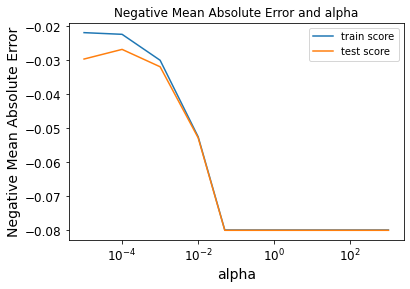

In [110]:
## Plot mean train score and mean test score ('Negative mean absolute error') of the models against different alpha paramaeters
plt.plot(cv_results["param_alpha"], cv_results["mean_train_neg_mean_absolute_error"])
plt.plot(cv_results["param_alpha"], cv_results["mean_test_neg_mean_absolute_error"])
plt.xscale('log')

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')

plt.show()

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'R2')

Text(0.5, 1.0, 'R2 and alpha')

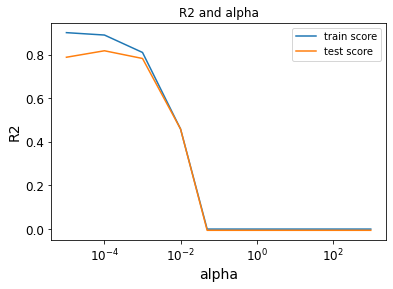

In [111]:
## Plot mean train score and mean test score (R2) of the models against different alpha paramaeters
plt.plot(cv_results["param_alpha"], cv_results["mean_train_r2"])
plt.plot(cv_results["param_alpha"], cv_results["mean_test_r2"])
plt.xscale('log')

plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper right')

plt.show()

Looking at Least negative mean absolute error and R2 score , the optimal value of alpha is 0.0001

In [112]:
# model with optimal alpha = 0.0001
# lasso regression
from sklearn import metrics
lm = Lasso(alpha=0.0001)

lm.fit(X_train, y_train)


Lasso(alpha=0.0001)

### Lasso : Prediction on Train dataset

In [113]:
# Predict on train dataset & find r2
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8807704518231348


In [114]:
## Find Mean absolute error 
print(metrics.mean_absolute_error(y_true=y_train, y_pred=y_train_pred))

0.022684339733169957


### Lasso : Prediction on Test dataset

In [115]:

## Scale the Numeric varaiables with MinMaxScaler. 
## Categorical variables dont need scaling because they are already converted to 0 or 1.

houseprice_test[houseprice_numeric.columns] = scaler.transform(houseprice_test[houseprice_numeric.columns])

In [116]:
X_test = houseprice_test.loc[:, houseprice_test.columns != 'SalePrice']
y_test = houseprice_test.loc[:, 'SalePrice']

In [117]:
## Predict on Test dataset & find r2
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8559859949830061


In [118]:
## Find Mean absolute error 
print(metrics.mean_absolute_error(y_true=y_test, y_pred=y_test_pred))

0.026907735213176832


As we see: :

   - Difference between absolute mean error on train (0.0226) and test data (0.0269) is low. 
   - R2 value is good and difference between train R2 and test R2 is low (0.8808132994033195 -0.8565300190129271 = 2.76% ). 

This indicates that our model performance is good and is not overfitted

### Lasso : Topmost Features selection

#### Find the coefficients generated by Lasso model 

In [119]:
## Put the coefficients of model in separate list
model_parameters = list(lm.coef_)
## Add the model intercept
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x,3) for x in model_parameters]

## Concatenate column names with respective coefficent values 
cols= X_train.columns
cols= cols.insert(0, "Constant")
cols_coef = list(zip(cols, model_parameters))

## Sort the absolute values of coefficient in descending order to get topmost important coefficients
sorted_cols_coef = sorted(cols_coef, key = lambda x: abs(x[1]), reverse= True) 
sorted_cols_coef


[('1stFlrSF', 0.265),
 ('2ndFlrSF', 0.186),
 ('Constant', 0.109),
 ('Neighborhood_NoRidge', 0.076),
 ('GarageCars', 0.069),
 ('LotArea', 0.065),
 ('OverallCond', 0.063),
 ('Neighborhood_StoneBr', 0.053),
 ('Neighborhood_NridgHt', 0.052),
 ('KitchenQual_TA', -0.046),
 ('BsmtQual_Gd', -0.045),
 ('KitchenQual_Fa', -0.045),
 ('KitchenQual_Gd', -0.043),
 ('BsmtQual_NA', -0.042),
 ('BsmtQual_TA', -0.042),
 ('Neighborhood_Somerst', 0.039),
 ('BsmtQual_Fa', -0.039),
 ('Neighborhood_Crawfor', 0.036),
 ('KitchenAbvGr', -0.034),
 ('BsmtFullBath', 0.033),
 ('HouseAge', -0.032),
 ('Neighborhood_Edwards', -0.032),
 ('BsmtExposure_Gd', 0.031),
 ('MSSubClass', -0.03),
 ('FullBath', 0.03),
 ('Exterior1st_BrkFace', 0.029),
 ('MasVnrArea', 0.026),
 ('Exterior2nd_ImStucc', 0.023),
 ('LotShape_IR3', -0.021),
 ('BsmtExposure_NA', -0.02),
 ('Fireplaces', 0.019),
 ('Neighborhood_Veenker', 0.019),
 ('Neighborhood_Mitchel', -0.018),
 ('LotFrontage', -0.016),
 ('ExterQual_TA', -0.016),
 ('BsmtUnfSF', 0.015),
 ('

Above variables with non-zero coefficients predict the price of house.

The `Lasso` model equation considering topmost 15 features which have highest impact on target variable is:

Saleprice = 0.265 * 1stFlrSF + 0.186 * 2ndFlrSF + 0.076 * Neighborhood_NoRidge + 0.069 * GarageCars + 0.065 * LotArea +  0.063 * OverallCond  + 0.053 * Neighborhood_StoneBr +  0.052 * Neighborhood_NridgHt - 0.046 * KitchenQual_TA - 0.045 * BsmtQual_Gd - 0.045 * KitchenQual_Fa - 0.043 * KitchenQual_Gd - 0.042 * BsmtQual_NA - 0.042 * BsmtQual_TA + 0.039 * Neighborhood_Somerst + 0.109

Above independent variables(features) are significant in predicting the price of a house & their coefficients describe the change in price of a house for a unit change in that independent variable.
    
  

### Ridge Regression

In [120]:
from sklearn.linear_model import Ridge


In [121]:
ridge = Ridge()

In [122]:
## Define the list of alpha 
## For Ridge regression - generally optimal alpha value is higher than that of Lasso regression. 
## So we will not run the model for very small values of alpha.
params = {'alpha': [0.1, 1.0, 2.0, 3.0,  4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0]}

In [123]:
## Cross validation
## Run GridSearchCV for Ridge regression & 2 scores - negative mean absolute error and R2 
## Get the diferent models for different values of alpha(regularization term) parameter

folds = 5 
model_cv = GridSearchCV (estimator = ridge,
                        param_grid = params,
                        scoring = scorings,
                        cv = folds,
                        refit = 'neg_mean_absolute_error',
                        return_train_score = True,
                        verbose = 1
                        )
model_cv.fit(X_train , y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,
                                   9.0, 10.0, 20.0]},
             refit='neg_mean_absolute_error', return_train_score=True,
             scoring=['neg_mean_absolute_error', 'r2'], verbose=1)

In [124]:
## Store the model performance results in cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)

In [125]:
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,split3_train_neg_mean_absolute_error,split4_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2
0,0.013382,0.011307,0.003584,0.000798,0.1,{'alpha': 0.1},-0.028722,-0.029277,-0.032135,-0.028341,-0.032727,-0.030240,0.001823,12,-0.023205,-0.018900,-0.021367,-0.023258,-0.022679,-0.021882,0.001639,0.821886,0.687648,0.748588,0.841753,0.821486,0.784272,0.057816,12,0.894273,0.914575,0.908745,0.890579,0.894966,0.900628,0.009315
1,0.005780,0.000745,0.003188,0.000399,1,{'alpha': 1.0},-0.026183,-0.029317,-0.031453,-0.026175,-0.030818,-0.028789,0.002241,10,-0.023404,-0.019622,-0.021556,-0.023533,-0.023048,-0.022233,0.001484,0.848154,0.717347,0.776175,0.862371,0.826919,0.806193,0.053181,10,0.888386,0.910165,0.902770,0.884995,0.890333,0.895330,0.009544
2,0.006378,0.000488,0.003065,0.000149,2,{'alpha': 2.0},-0.025253,-0.029537,-0.031156,-0.025771,-0.030190,-0.028382,0.002404,6,-0.023776,-0.020416,-0.021915,-0.023769,-0.023361,-0.022647,0.001308,0.856159,0.730937,0.786941,0.867062,0.825896,0.813399,0.049728,9,0.882946,0.905063,0.896970,0.880071,0.885755,0.890161,0.009399
3,0.007933,0.001389,0.004600,0.000761,3,{'alpha': 3.0},-0.024792,-0.029720,-0.030997,-0.025616,-0.029958,-0.028216,0.002511,3,-0.024079,-0.021043,-0.022275,-0.023996,-0.023658,-0.023010,0.001179,0.859485,0.737763,0.792749,0.868503,0.823488,0.816398,0.047675,5,0.878446,0.900553,0.892201,0.875879,0.881780,0.885772,0.009245
4,0.006179,0.000400,0.003599,0.001219,4,{'alpha': 4.0},-0.024644,-0.029937,-0.030912,-0.025517,-0.029891,-0.028180,0.002572,1,-0.024403,-0.021567,-0.022605,-0.024248,-0.023937,-0.023352,0.001095,0.860988,0.741436,0.796486,0.868555,0.820596,0.817612,0.046335,2,0.874489,0.896487,0.888023,0.872118,0.878176,0.881859,0.009108


In [126]:
cv_results["param_alpha"] = cv_results["param_alpha"].astype("float32")

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'Negative Mean Absolute Error')

Text(0.5, 1.0, 'Negative Mean Absolute Error and alpha')

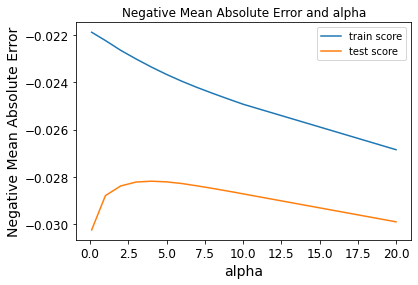

In [127]:
## Plot mean train score and mean test score ('Negative mean absolute error') of the models against different alpha paramaeters
plt.plot(cv_results["param_alpha"], cv_results["mean_train_neg_mean_absolute_error"])
plt.plot(cv_results["param_alpha"], cv_results["mean_test_neg_mean_absolute_error"])

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')

plt.show()

Text(0.5, 0, 'alpha')

Text(0, 0.5, 'R2')

Text(0.5, 1.0, 'R2 and alpha')

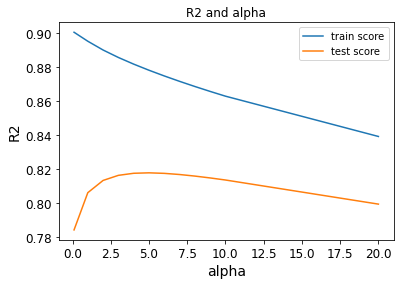

In [128]:
## Plot mean train score and mean test score (R2) of the models against different alpha paramaeters
plt.plot(cv_results["param_alpha"], cv_results["mean_train_r2"])
plt.plot(cv_results["param_alpha"], cv_results["mean_test_r2"])
#plt.xscale('log')

plt.xlabel('alpha')
plt.ylabel('R2')
plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper right')

plt.show()

Looking at Least negative mean absolute error and R2 score , the optimal value of alpha is 4

In [129]:
# Model with optimal alpha = 4
# Ridge regression
from sklearn import metrics
lmridge = Ridge(alpha= 4 )

lmridge.fit(X_train, y_train)


Ridge(alpha=4)

### Ridge : Prediction on Train dataset

In [130]:
# Predict on train dataset & find r2
y_train_pred = lmridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8770932427774122


In [131]:
## Find Mean absolute error 
print(metrics.mean_absolute_error(y_true=y_train, y_pred=y_train_pred))

0.023422566366176137


### Ridge : Prediction on Test dataset

In [132]:
## Predict on Test dataset & find r2
y_test_pred = lmridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8526974297472959


In [133]:
## Find Mean absolute error 
print(metrics.mean_absolute_error(y_true=y_test, y_pred=y_test_pred))

0.026895506546078977


As we see: :

   - Difference between absolute mean error on train (0.0235) and test data (0.0269) is low. 
   - R2 value is good and difference between train R2 and test R2 is low (0.8770932427774122 - 0.8526974297472959 = 2.78% ). 

This indicates that our model performance is good and is not overfitted

### Ridge : Topmost Features selection

#### Find the coefficients generated by Ridge model 

In [134]:
## Put the coefficients of model in separate list
model_parameters = list(lmridge.coef_)
## Add the model intercept
model_parameters.insert(0, lmridge.intercept_)
model_parameters = [round(x,3) for x in model_parameters]

## Concatenate column names with respective coefficent values 
cols= X_train.columns
cols= cols.insert(0, "Constant")
cols_coef = list(zip(cols, model_parameters))

## Sort the absolute values of coefficient in descending order to get topmost important coefficients 
sorted_cols_coef = sorted(cols_coef, key = lambda x: abs(x[1]), reverse= True) 
sorted_cols_coef


[('Constant', 0.132),
 ('2ndFlrSF', 0.113),
 ('1stFlrSF', 0.094),
 ('Neighborhood_NoRidge', 0.072),
 ('GarageCars', 0.066),
 ('FullBath', 0.056),
 ('OverallCond', 0.049),
 ('BsmtQual_Gd', -0.044),
 ('TotalBsmtSF', 0.043),
 ('Neighborhood_StoneBr', 0.043),
 ('Neighborhood_NridgHt', 0.042),
 ('KitchenQual_TA', -0.042),
 ('LotArea', 0.041),
 ('BsmtQual_TA', -0.041),
 ('KitchenQual_Fa', -0.039),
 ('KitchenQual_Gd', -0.039),
 ('Neighborhood_Edwards', -0.036),
 ('MasVnrArea', 0.035),
 ('BsmtQual_Fa', -0.035),
 ('BsmtUnfSF', 0.033),
 ('BsmtFullBath', 0.033),
 ('Neighborhood_Crawfor', 0.032),
 ('BsmtExposure_Gd', 0.03),
 ('Fireplaces', 0.029),
 ('Exterior1st_BrkFace', 0.029),
 ('BsmtFinSF1', 0.028),
 ('Exterior2nd_ImStucc', 0.028),
 ('MSSubClass', -0.027),
 ('Neighborhood_Somerst', 0.026),
 ('Neighborhood_Mitchel', -0.024),
 ('ExterQual_TA', -0.024),
 ('Neighborhood_IDOTRR', -0.023),
 ('BldgType_Twnhs', -0.023),
 ('WoodDeckSF', 0.022),
 ('ExterQual_Fa', -0.022),
 ('FireplaceQu_Po', -0.022),
 (

Above variables with non-zero coefficients predict the price of house. 

The `Ridge` model equation considering topmost 15 features which have highest impact on target variable is:

Saleprice =  0.113 * 2ndFlrSF + 0.094 * 1stFlrSF + 0.072 * Neighborhood_NoRidge + 0.066 * GarageCars + 0.056 * FullBath + 0.049 * OverallCond  - 0.044 * BsmtQual_Gd + 0.043 * TotalBsmtSF +   0.043 * Neighborhood_StoneBr +  0.042 * Neighborhood_NridgHt - 0.042 * KitchenQual_TA + 0.041 * LotArea   - 0.041 * BsmtQual_TA - 0.039 * KitchenQual_Fa - 0.039 * KitchenQual_Gd + 0.132
    
Above independent variables(features) are significant in predicting the price of a house & their coefficients describe the change in price of a house for a unit change in that independent variable.